In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
sys.path.insert(0, '/home/jovyan/braindecode/')
sys.path.insert(0, '/home/jovyan/mne-python/')
import pickle
import warnings
warnings.filterwarnings("ignore", message="y_pred contains classes not")

import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, balanced_accuracy_score

from braindecode.datasets.tuh import TUHAbnormal
from braindecode.preprocessing import create_fixed_length_windows

from decode_tueg import (
    DataScaler, TargetScaler, trial_age_mae, Augmenter, ChannelsSymmetryFB,
    get_datasets, test_name, create_windows, create_final_scores,
    plot_chronological_vs_predicted_age, plot_age_gap_hist,
    plot_thresh_to_acc, plot_joint_scatter, plot_learning, save_fig,
    load_exp, predict_ds, plot_heatmaps
)

In [3]:
# base_dir = '/home/jovyan/new_full_runs/'
base_dir = '/home/jovyan/outdated_runs/'
exps = {
    'huber': {
         0: '220824144055632350',
         1: '220824191628058941',
         2: '220824144128724203',
         3: '220824144139015381',
         4: '220824144141880751',
    },
    'mse': {
        0: '220825094141505678',
        1: '220825094133879370',
        2: '220825094140973211',
        3: '220825094139201071',
        4: '220825141741077814',
        
    },
    'mae': {
        0: '220826151546978486',
         1: '220826104417444602',
         2: '220826104408477306',
         3: '220826104426911900',
         4: '220826104430495864',
    },
    'nll': {
        0: '220831200810717294',
    },
    # old results
#     'huber': {
#         0: '220824144254199487',
#     },
#     'nll': {
#         0: '220725141944002603'
#     },
}
# seeds = []  #  TODO: run multiple seeds
model = 'train_end'  # 'train_end', 'valid_best'
n_jobs = 6

In [4]:
only_valid = True
subsets = ['mixed']#, 'mixed', 'abnormal']
mem_efficient = True
exp_style = 'nll'

In [5]:
df_concat = pd.concat(dfs).reset_index()

NameError: name 'dfs' is not defined

In [ ]:
df_concat

In [ ]:
plot_only_valid = False
this_df_concat = df_concat[df_concat.split == 'valid'] if plot_only_valid else df_concat

split valid subset mixed  (539, 8)


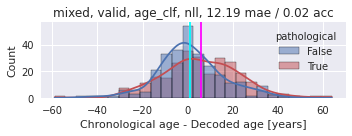

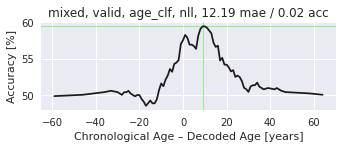

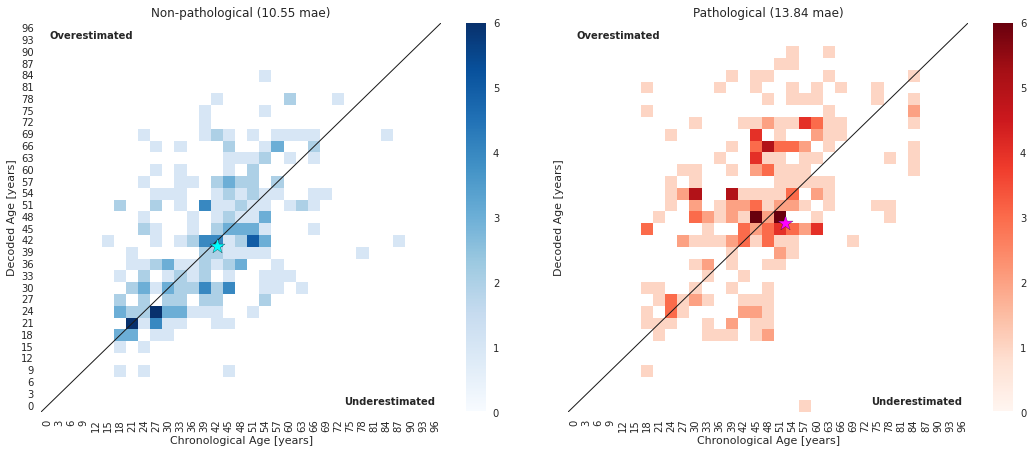

In [22]:
grouping = ['split', 'subset']#, 'fold']
splits = list(this_df_concat.split.unique())
n_splits = len(splits) 
subsets = list(this_df_concat.subset.unique())
n_subsets = len(subsets)
fig2, ax_arr2 = plt.subplots(
    n_splits, n_subsets, figsize=(5*n_subsets, 2*n_splits), squeeze=False, sharex=True)
fig3, ax_arr3 = plt.subplots(
    n_splits, n_subsets, figsize=(5*n_subsets, 2*n_splits), squeeze=False, sharex=True)
for x, df in this_df_concat.groupby(grouping):
    split_i = splits.index(x[0])
    subset_i = subsets.index(x[1])
    fold = '' if len(x) == 2 else x[2]
    print('split', x[0], 'subset', x[1], fold, df.shape)

    mae = mean_absolute_error(df.y_true, df.y_pred)
    title = f"{x[1]}, {x[0]}, {config.target_name}, {config.loss}, {mae:.2f} mae"
    if config.target_name != 'age':
        bal_acc = balanced_accuracy_score(df.y_true, df.y_pred)
        title += f" / {bal_acc:.2f} acc"
    ax4 = plot_heatmaps(df, 3, 100)
#     ax4.fig.subplots_adjust(top=0.94)
#     ax4.fig.suptitle(title);

    ax2 = plot_age_gap_hist(
        df,
        ax=ax_arr2[split_i, subset_i],
    )
    ax2.figure.tight_layout()
    ax2.set_title(title)

    ax3 = plot_thresh_to_acc(
        df,
        ax=ax_arr3[split_i, subset_i],
    )
    ax3.figure.tight_layout()
    ax3.set_title(title)

In [5]:
plot_learning(
    pd.DataFrame(clf.history),
    'loss',
    'nll',
    'valid'
)

NameError: name 'clf' is not defined

In [5]:
import sys
sys.path.insert(0, '/home/jovyan/braindecode/')
sys.path.insert(0, '/home/jovyan/mne-python/')
import pickle

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_color_codes('deep')
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from sklearn.metrics import mean_absolute_error

from decode_tueg import plot_heatmaps, plot_age_gap_hist, plot_thresh_to_acc, plot_learning_curves

In [6]:
df = pd.read_csv('/home/jovyan/220824_5fcv_huber.csv', index_col=0)

In [7]:
df

,index,y_pred,y_true,pathological,exp,subset,split,fold
0,0,47.562190,55.0,False,220824144139015381,normal,valid,3
1,1,63.435150,70.0,False,220824144139015381,normal,valid,3
2,2,40.898357,39.0,False,220824144139015381,normal,valid,3
3,3,58.216160,59.0,False,220824144139015381,normal,valid,3
4,4,26.794992,24.0,False,220824144139015381,normal,valid,3
...,...,...,...,...,...,...,...,...
26925,1051,48.591175,38.0,True,220824144055632350,abnormal,train,0
26926,1052,44.417076,85.0,True,220824144055632350,abnormal,train,0
26927,1053,40.556297,31.0,True,220824144055632350,abnormal,train,0
26928,1054,46.593445,40.0,True,220824144055632350,abnormal,train,0


In [8]:
# only look at valid set
df = df[df.split == 'valid']

In [9]:
df.shape

(5386, 8)

In [10]:
mean_absolute_error(df.y_true, df.y_pred)

9.395337378707762

In [11]:
mean_absolute_error(df[df.pathological].y_true, df[df.pathological].y_pred)

11.63164204531722

In [12]:
mean_absolute_error(df[~df.pathological].y_true, df[~df.pathological].y_pred)

7.232541631015341

In [13]:
bin_size = 2
max_age = 100
hist_max_count = 450

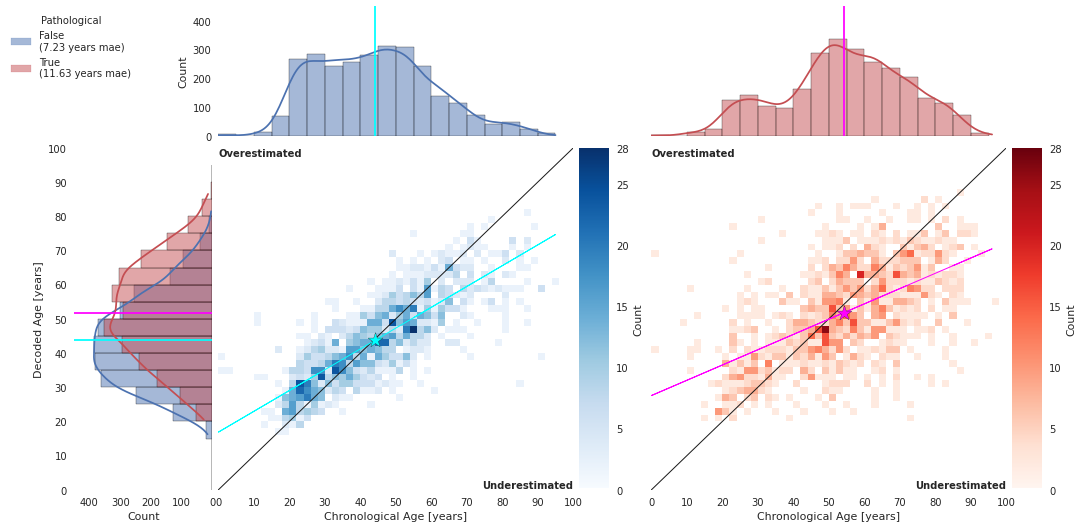

In [14]:
fig = plot_heatmaps(df, bin_size, max_age, hist_max_count)
# fig.savefig('/home/jovyan/new2dhist.png', bbox_inches='tight', dpi=300)

/home/jovyan/tueg_age_decoding/decode_tueg.py:2157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gap'] = df.y_true - df.y_pred


Text(0.5, 1.0, '')

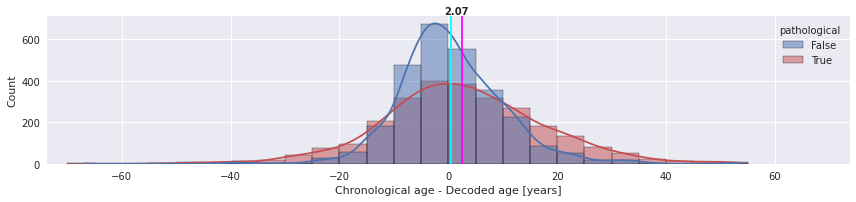

In [15]:
ax = plot_age_gap_hist(df)
ax.get_figure().tight_layout()
ax.set_title('')
# ax.get_figure().savefig('/home/jovyan/age_gap.png', dpi=300, bbox_inches='tight')

In [16]:
# plot learning curves

In [25]:
histories = [pd.read_csv(f'/home/jovyan/new_full_runs/{exp}/history.csv', index_col=0) for exp in df.exp.unique()]

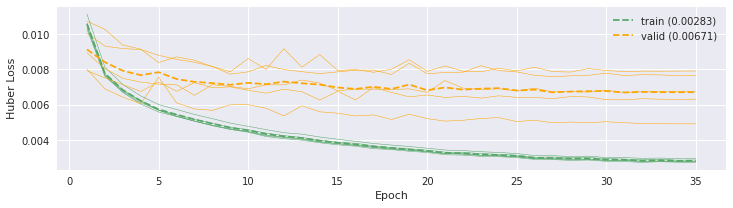

In [27]:
ax = plot_learning_curves(histories, 'Huber Loss')

In [82]:
# plot age gap proxy result

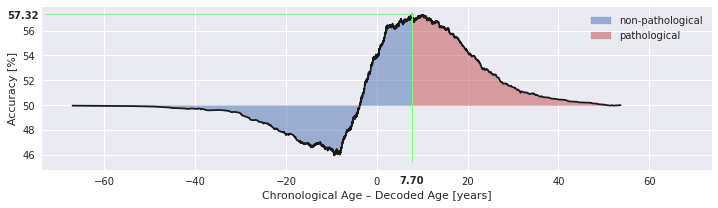

In [83]:
fig, ax = plt.subplots(1,1,figsize=(12,3))
ax = plot_thresh_to_acc(df, ax=ax)
# ax.set_ylim(45,58)
# ax.set_xlim(-70,70)
# fig.savefig('/home/jovyan/proxy.png', bbox_inches='tight', dpi=300)

In [84]:
# plot longitudinal transition decoding results

In [ ]:
bin_size = 2
max_age = 100

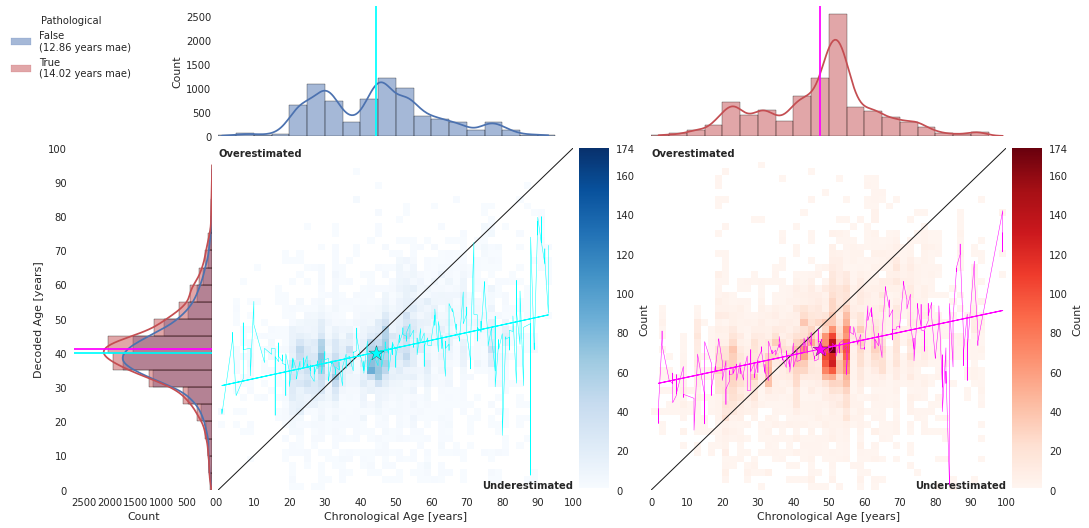

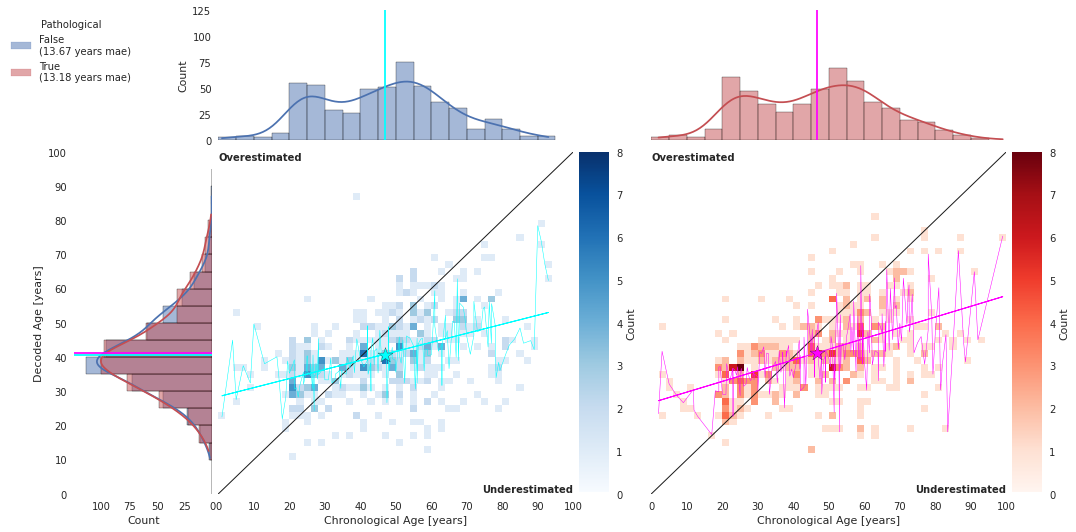

In [ ]:
for subject_wise in [False, True]:
    hist_max_count = 2700 if not subject_wise else 125

    # fdescribe i, longitudinal in enumerate(['transition', 'non_pathological', 'pathological']):
    longitudinal = 'transition'
    df = pd.read_csv(f'/home/jovyan/220824_5fcv_huber_longitudinal_{longitudinal}.csv', index_col=0)
    # --- hack
    with open(f'/home/jovyan/longitudinal/{longitudinal}.pkl', 'rb') as f:
        ds = pickle.load(f)
    df['subject'] = 5*ds.description['subject'].to_list()
    # ---
    if subject_wise:
        df = df.groupby(['subject', 'pathological'], as_index=False).mean()

    ax_arr = plot_heatmaps(df, bin_size, max_age, hist_max_count)
    s = 'recording' if not subject_wise else 'subject'
    # ax_arr.get_figure().savefig(
    #     f'/home/jovyan/longitudinal_{longitudinal}_chronological_vs_predicted_{s}_age.png',
    #     dpi=300, bbox_inches='tight')

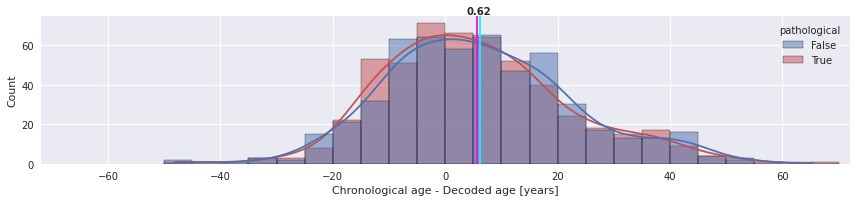

In [103]:
ax = plot_age_gap_hist(df)
ax.get_figure().tight_layout()
ax.set_title('')
s = 'recording' if not subject_wise else 'subject'
# ax.get_figure().savefig(
#     f'/home/jovyan/longitudinal_transition_{s}_age_gap.png', 
#     dpi=300, bbox_inches='tight')

In [ ]:
# plot longitudinal pathological and non-pathological decoding results

In [ ]:
bin_size = 2
max_age = 100

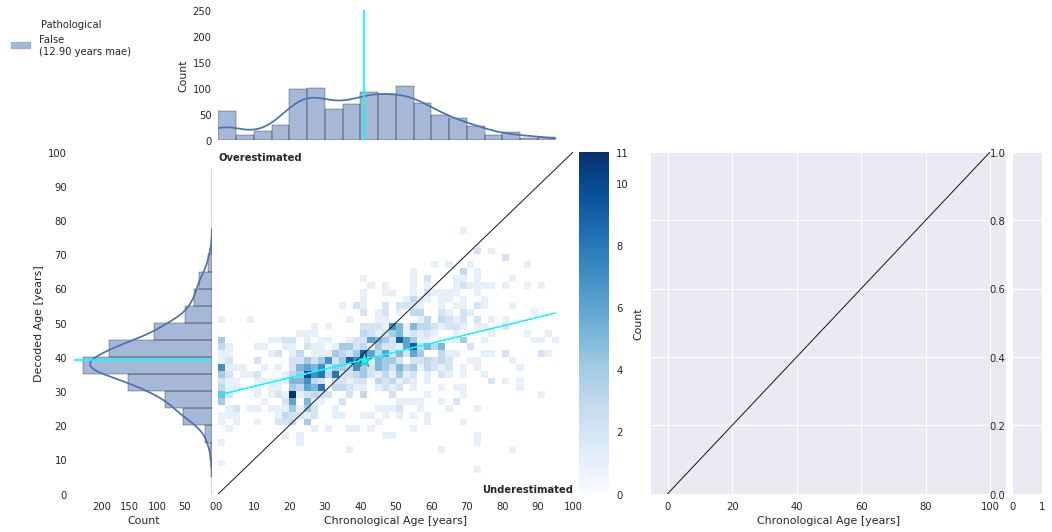

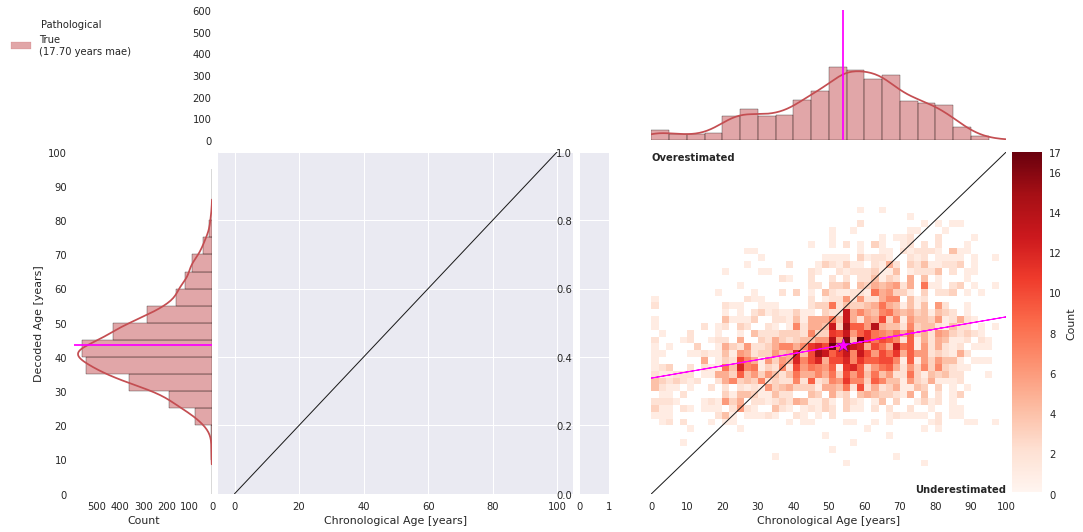

In [118]:
for subject_wise in [True]:
    for longitudinal in ['non_pathological', 'pathological']:
        if longitudinal == 'non_pathological':
            hist_max_count = 2200 if not subject_wise else 250
        elif longitudinal == 'pathological':
            hist_max_count = 2200 if not subject_wise else 600

        df = pd.read_csv(f'/home/jovyan/220824_5fcv_huber_longitudinal_{longitudinal}.csv', index_col=0)
        # --- hack
        with open(f'/home/jovyan/longitudinal/{longitudinal}.pkl', 'rb') as f:
            ds = pickle.load(f)
        df['subject'] = 5*ds.description['subject'].to_list()
        # ---
        if subject_wise:
            df = df.groupby(['subject', 'pathological'], as_index=False).mean()

        ax_arr = plot_heatmaps(df, bin_size, max_age, hist_max_count)
        s = 'recording' if not subject_wise else 'subject'
        # ax_arr.get_figure().savefig(
        #     f'/home/jovyan/longitudinal_{longitudinal}_chronological_vs_predicted_{s}_age.png',
        #     dpi=300, bbox_inches='tight')